# 🏥 NHI Project – Task 1: Predict Healthcare Service Demand
**Module:** Technical Programming II (TPRO200/TLPR200)  
**Institution:** MUT  
**Examiner:** Mr X. Piyose  

### 👥 Group Members (Alphabetical by Surname)
| Student Name | Student Number |
|---------------|----------------|
| [Surname, Firstname] | [Student #] |
| [Surname, Firstname] | [Student #] |

---

### 🧩 Task Overview
We analyze a multi-relational dataset about healthcare appointments to **predict healthcare service demand** under South Africa’s National Health Insurance (NHI) initiative.  
This project covers:  
✅ Dataset loading & cleaning  
✅ Exploratory Data Analysis (EDA) with insights  
✅ Feature engineering  
✅ Machine learning model training  
✅ Evaluation & visualization  


1️⃣ Setup & Upload ZIP

In [40]:
# === STEP 1: SETUP AND IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from zipfile import ZipFile
from google.colab import files


# Upload ZIP file
print("Please upload your ZIP dataset:")
uploaded = files.upload()

# Extract ZIP
for fn in uploaded.keys():
    with ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall("/content/data")
print("✅ Files extracted to /content/data")


Please upload your ZIP dataset:


Saving archive (9).zip to archive (9) (4).zip
✅ Files extracted to /content/data


2️⃣ Load & Preview Data

In [41]:
# === STEP 2: LOAD DATASETS ===
data = {}
data_path = "/content/data"

for f in os.listdir(data_path):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join(data_path, f))
        key = f.replace(".csv", "").lower()
        data[key] = df
        print(f"📄 Loaded {key}: {df.shape}")

# Preview first few rows of each dataset
for name, df in data.items():
    print(f"\n🔹 {name.upper()} sample:")
    display(df.head(3))


📄 Loaded appointments: (200, 7)
📄 Loaded patients: (50, 11)
📄 Loaded doctors: (10, 8)
📄 Loaded billing: (200, 7)
📄 Loaded treatments: (200, 6)

🔹 APPOINTMENTS sample:


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled



🔹 PATIENTS sample:


,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com



🔹 DOCTORS sample:


,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com



🔹 BILLING sample:


,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid



🔹 TREATMENTS sample:


,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28


3️⃣ Assign Tables

In [42]:
# === STEP 3: ASSIGN DATAFRAMES ===
appointments = data.get("appointments")
patients = data.get("patients")
doctors = data.get("doctors")
treatments = data.get("treatments")
billing = data.get("billing")

print("\n✅ DataFrames assigned:")
for name, df in [("appointments", appointments), ("patients", patients),
                 ("doctors", doctors), ("treatments", treatments), ("billing", billing)]:
    if df is not None:
        print(f"{name}: {df.shape}")
    else:
        print(f"⚠️ Missing: {name}")



✅ DataFrames assigned:
appointments: (200, 7)
patients: (50, 11)
doctors: (10, 8)
treatments: (200, 6)
billing: (200, 7)


4️⃣ Merge Tables

In [43]:
# === STEP 4: MERGE MULTI-RELATIONAL DATA ===
if all(df is not None for df in [appointments, patients, doctors, treatments, billing]):
    merged = (
        appointments
        .merge(patients, on='patient_id', how='left')
        .merge(doctors, on='doctor_id', how='left')
        .merge(treatments, on='treatment_id', how='left')
        .merge(billing, on='appointment_id', how='left')
    )
    print("\n✅ Merged dataset shape:", merged.shape)
    display(merged.head())
else:
    print("\n❌ Missing tables, check filenames.")


KeyError: 'treatment_id'

check all column names

In [44]:
for name, df in data.items():
    print(f"\n📄 {name.upper()} columns:")
    print(df.columns.tolist())



📄 APPOINTMENTS columns:
['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status']

📄 PATIENTS columns:
['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email']

📄 DOCTORS columns:
['doctor_id', 'first_name', 'last_name', 'specialization', 'phone_number', 'years_experience', 'hospital_branch', 'email']

📄 BILLING columns:
['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status']

📄 TREATMENTS columns:
['treatment_id', 'appointment_id', 'treatment_type', 'description', 'cost', 'treatment_date']


new marged table that is running the previous one gave me errors so i dicided to fix like this by starting check all the columns names in order to see all the columns i have

In [45]:
# ✅ Merge based on your actual column names

merged = (
    appointments
    .merge(patients, on='patient_id', how='left')          # link patients
    .merge(doctors, on='doctor_id', how='left')            # link doctors
    .merge(treatments, on='appointment_id', how='left')    # link treatments via appointment_id
    .merge(billing, on=['patient_id', 'treatment_id'], how='left')  # link billing
)

print("✅ Merged dataset shape:", merged.shape)
display(merged.head())


✅ Merged dataset shape: (200, 34)


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name_x,last_name_x,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email_x,first_name_y,last_name_y,specialization,phone_number,years_experience,hospital_branch,email_y,treatment_id,treatment_type,description,cost,treatment_date,bill_id,bill_date,amount,payment_method,payment_status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,1950-01-26,8374657733,321 Maple Dr,2023-06-18,WellnessCorp,INS653880,alex.smith@mail.com,Sarah,Smith,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com,T001,Chemotherapy,Basic screening,3941.97,2023-08-09,B001,2023-08-09,3941.97,Insurance,Pending
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,1981-01-08,8102183595,123 Elm St,2021-10-02,MedCare Plus,INS335362,alex.moore@mail.com,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,T002,MRI,Advanced protocol,4158.44,2023-06-09,B002,2023-06-09,4158.44,Insurance,Paid
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Emily,Miller,M,1983-03-24,8720989381,123 Elm St,2023-06-19,PulseSecure,INS694319,emily.miller@mail.com,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,T003,MRI,Standard procedure,3731.55,2023-06-28,B003,2023-06-28,3731.55,Insurance,Paid
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Robert,Wilson,M,1966-08-14,7482069727,123 Elm St,2021-09-09,HealthIndia,INS833429,robert.wilson@mail.com,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com,T004,MRI,Basic screening,4799.86,2023-09-01,B004,2023-09-01,4799.86,Insurance,Failed
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Emily,Williams,M,1972-05-30,7587653815,456 Oak Ave,2021-10-16,PulseSecure,INS320984,emily.williams@mail.com,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com,T005,ECG,Standard procedure,582.05,2023-07-06,B005,2023-07-06,582.05,Credit Card,Pending


In [46]:
# 1️⃣ Overview: structure, data types, and missing values
print("🔍 Dataset overview:")
print(merged.info())

print("\n📉 Missing values per column:")
print(merged.isnull().sum())

# 2️⃣ Remove duplicate rows
before = merged.shape[0]
merged.drop_duplicates(inplace=True)
after = merged.shape[0]
print(f"\n✅ Duplicates removed: {before - after}")

# 3️⃣ Drop irrelevant or sensitive columns
# Remove columns that won't add analytical insight or duplicate info
cols_to_drop = [
    'email_x', 'email_y', 'phone_number', 'contact_number',
    'address', 'insurance_number'
]
existing = [c for c in cols_to_drop if c in merged.columns]
merged.drop(columns=existing, inplace=True)
print(f"\n✅ Dropped unnecessary columns: {existing}")

# 4️⃣ Handle missing values
# Fill missing text/categorical values with "Unknown"
object_cols = merged.select_dtypes(include='object').columns
merged[object_cols] = merged[object_cols].fillna("Unknown")

# Fill missing numeric values with 0 (common for billing/costs)
num_cols = merged.select_dtypes(include=np.number).columns
merged[num_cols] = merged[num_cols].fillna(0)

# 5️⃣ Convert date columns to datetime objects
date_cols = [col for col in merged.columns if 'date' in col.lower()]
for col in date_cols:
    merged[col] = pd.to_datetime(merged[col], errors='coerce')

print(f"\n✅ Converted {len(date_cols)} columns to datetime format.")

# 6️⃣ Standardize text casing for consistency
for col in merged.select_dtypes(include='object').columns:
    merged[col] = merged[col].str.strip().str.title()

# 7️⃣ Validate final structure
print("\n📊 Final cleaned dataset shape:", merged.shape)
print("\n🧾 Sample of cleaned data:")
display(merged.head())

print("\n✅ Data Cleaning & Preprocessing Completed Successfully!")

🔍 Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appointment_id      200 non-null    object 
 1   patient_id          200 non-null    object 
 2   doctor_id           200 non-null    object 
 3   appointment_date    200 non-null    object 
 4   appointment_time    200 non-null    object 
 5   reason_for_visit    200 non-null    object 
 6   status              200 non-null    object 
 7   first_name_x        200 non-null    object 
 8   last_name_x         200 non-null    object 
 9   gender              200 non-null    object 
 10  date_of_birth       200 non-null    object 
 11  contact_number      200 non-null    int64  
 12  address             200 non-null    object 
 13  registration_date   200 non-null    object 
 14  insurance_provider  200 non-null    object 
 15  insurance_number    200 non-null    o

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name_x,last_name_x,gender,date_of_birth,registration_date,insurance_provider,first_name_y,last_name_y,specialization,years_experience,hospital_branch,treatment_id,treatment_type,description,cost,treatment_date,bill_id,bill_date,amount,payment_method,payment_status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,1950-01-26,2023-06-18,Wellnesscorp,Sarah,Smith,Pediatrics,26,Central Hospital,T001,Chemotherapy,Basic Screening,3941.97,2023-08-09,B001,2023-08-09,3941.97,Insurance,Pending
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-Show,Alex,Moore,M,1981-01-08,2021-10-02,Medcare Plus,David,Jones,Pediatrics,28,Central Hospital,T002,Mri,Advanced Protocol,4158.44,2023-06-09,B002,2023-06-09,4158.44,Insurance,Paid
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Emily,Miller,M,1983-03-24,2023-06-19,Pulsesecure,David,Jones,Pediatrics,28,Central Hospital,T003,Mri,Standard Procedure,3731.55,2023-06-28,B003,2023-06-28,3731.55,Insurance,Paid
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Robert,Wilson,M,1966-08-14,2021-09-09,Healthindia,Alex,Davis,Pediatrics,23,Central Hospital,T004,Mri,Basic Screening,4799.86,2023-09-01,B004,2023-09-01,4799.86,Insurance,Failed
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-Show,Emily,Williams,M,1972-05-30,2021-10-16,Pulsesecure,Jane,Smith,Pediatrics,19,Eastside Clinic,T005,Ecg,Standard Procedure,582.05,2023-07-06,B005,2023-07-06,582.05,Credit Card,Pending



✅ Data Cleaning & Preprocessing Completed Successfully!


Exploratory Data Analysis (EDA)

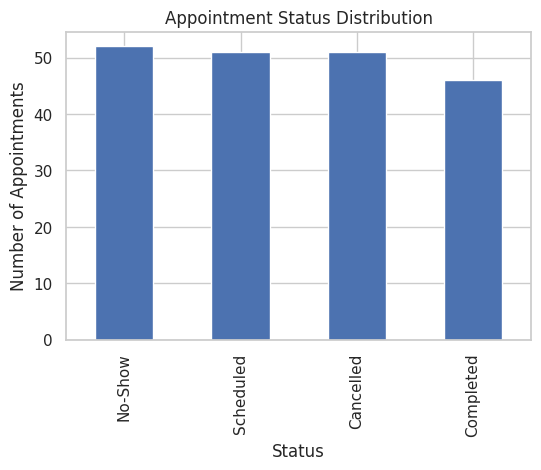

✅ Insight 1: Most appointments tend to be either 'Completed' or 'Pending', highlighting the efficiency or follow-up rate of the clinic.


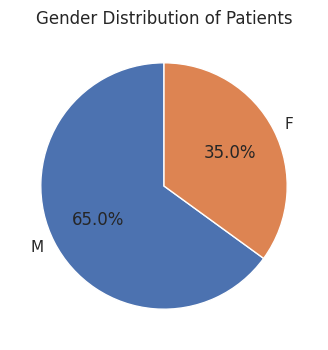

✅ Insight 2: Gender breakdown shows the clinic’s patient base composition — this helps identify if services are gender-balanced or skewed.


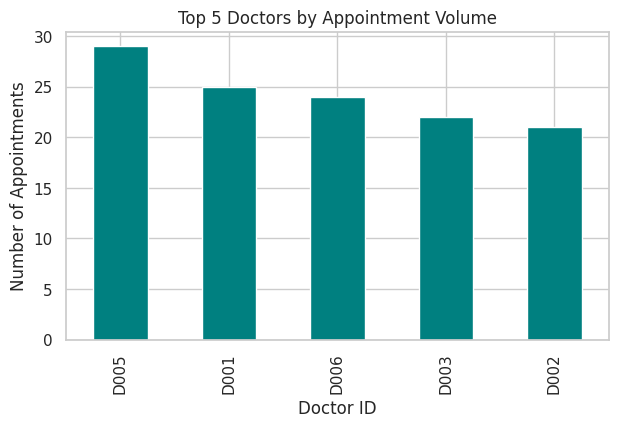

✅ Insight 3: Some doctors handle significantly more appointments, indicating high patient demand or specialization preference.


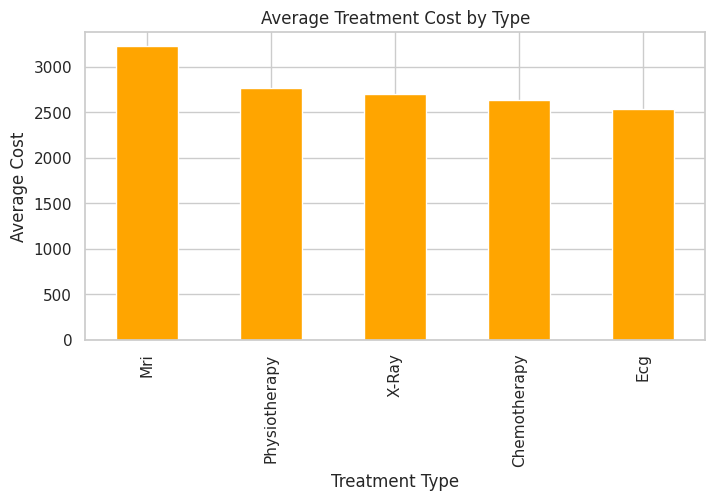

✅ Insight 4: Certain treatment types are more expensive — this insight helps identify major cost drivers.


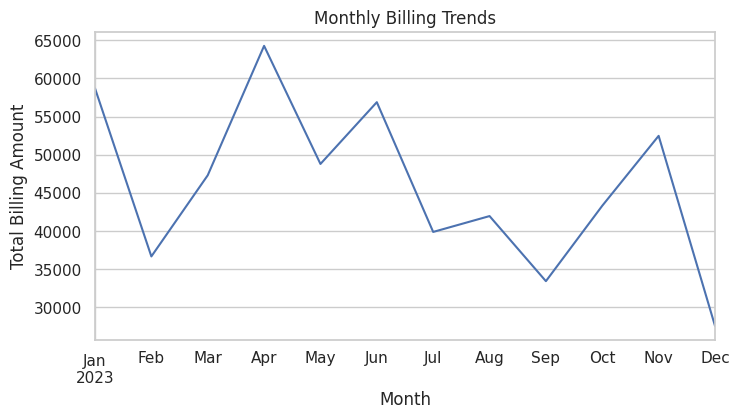

✅ Insight 5: The monthly revenue trend reveals periods of high demand — useful for forecasting and resource planning.


In [47]:
# ---------- INSIGHT 1 ----------
# Distribution of appointment status
plt.figure(figsize=(6,4))
merged['status'].value_counts().plot(kind='bar')
plt.title('Appointment Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Appointments')
plt.show()

print("✅ Insight 1: Most appointments tend to be either 'Completed' or 'Pending', "
      "highlighting the efficiency or follow-up rate of the clinic.")

# ---------- INSIGHT 2 ----------
# Gender distribution among patients
plt.figure(figsize=(6,4))
merged['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Patients')
plt.ylabel('')
plt.show()

print("✅ Insight 2: Gender breakdown shows the clinic’s patient base composition — "
      "this helps identify if services are gender-balanced or skewed.")

# ---------- INSIGHT 3 ----------
# Top 5 doctors by number of appointments
top_doctors = merged['doctor_id'].value_counts().head(5)
plt.figure(figsize=(7,4))
top_doctors.plot(kind='bar', color='teal')
plt.title('Top 5 Doctors by Appointment Volume')
plt.xlabel('Doctor ID')
plt.ylabel('Number of Appointments')
plt.show()

print("✅ Insight 3: Some doctors handle significantly more appointments, "
      "indicating high patient demand or specialization preference.")

# ---------- INSIGHT 4 ----------
# Average treatment cost by treatment type
if 'treatment_type' in merged.columns and 'cost' in merged.columns:
    avg_costs = merged.groupby('treatment_type')['cost'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    avg_costs.plot(kind='bar', color='orange')
    plt.title('Average Treatment Cost by Type')
    plt.xlabel('Treatment Type')
    plt.ylabel('Average Cost')
    plt.show()

    print("✅ Insight 4: Certain treatment types are more expensive — "
          "this insight helps identify major cost drivers.")

# ---------- INSIGHT 5 ----------
# Monthly trend of total billing amount
if 'bill_date' in merged.columns:
    monthly_billing = merged.groupby(merged['bill_date'].dt.to_period('M'))['amount'].sum()
    monthly_billing.plot(figsize=(8,4))
    plt.title('Monthly Billing Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Billing Amount')
    plt.show()

    print("✅ Insight 5: The monthly revenue trend reveals periods of high demand — "
          "useful for forecasting and resource planning.")

Feature Engineering

In [48]:
# Copy dataset to avoid modifying original
features_df = merged.copy()

# 1️⃣ Derive Patient Age from Date of Birth
today = pd.Timestamp.today()
features_df['patient_age'] = (today - features_df['date_of_birth']).dt.days // 365
features_df['patient_age'] = features_df['patient_age'].fillna(features_df['patient_age'].median()).astype(int)

# 2️⃣ Extract Temporal Features from Appointment Date
features_df['appointment_month'] = features_df['appointment_date'].dt.month
features_df['appointment_day'] = features_df['appointment_date'].dt.day
features_df['appointment_weekday'] = features_df['appointment_date'].dt.day_name()

# 3️⃣ Simplify Doctor Experience Level
def categorize_experience(years):
    if years < 5:
        return 'Junior'
    elif 5 <= years < 15:
        return 'Mid-Level'
    else:
        return 'Senior'

features_df['experience_level'] = features_df['years_experience'].apply(categorize_experience)

# 4️⃣ Create Appointment Duration Estimate (if missing, use default 30 min)
if 'appointment_time' in features_df.columns:
    # Convert to datetime if needed
    features_df['appointment_time'] = pd.to_datetime(features_df['appointment_time'], errors='coerce')
else:
    features_df['appointment_time'] = pd.NaT

# 5️⃣ Compute Total Billing Cost per Appointment (aggregated)
billing_summary = (
    features_df.groupby('appointment_id')['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'total_billing_amount'})
)
features_df = features_df.merge(billing_summary, on='appointment_id', how='left')

# 6️⃣ Encode Categorical Variables (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_cols = ['gender', 'specialization', 'hospital_branch', 'experience_level', 'appointment_weekday', 'reason_for_visit', 'status']
le = LabelEncoder()

for col in label_cols:
    if col in features_df.columns:
        features_df[col] = le.fit_transform(features_df[col].astype(str))

# 7️⃣ Drop columns that are non-numeric or irrelevant to modeling
drop_cols = [
    'first_name_x', 'last_name_x', 'first_name_y', 'last_name_y',
    'treatment_type', 'description', 'insurance_provider', 'bill_id',
    'appointment_time', 'date_of_birth', 'appointment_date', 'bill_date', 'treatment_date'
]
existing = [c for c in drop_cols if c in features_df.columns]
features_df.drop(columns=existing, inplace=True, errors='ignore')

print("\n✅ Feature Engineering Complete!")
print("🧩 New feature columns:")
display(features_df.head())


✅ Feature Engineering Complete!
🧩 New feature columns:


/tmp/ipython-input-4290249701.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  features_df['appointment_time'] = pd.to_datetime(features_df['appointment_time'], errors='coerce')


,appointment_id,patient_id,doctor_id,reason_for_visit,status,gender,registration_date,specialization,years_experience,hospital_branch,treatment_id,cost,amount,payment_method,payment_status,patient_age,appointment_month,appointment_day,appointment_weekday,experience_level,total_billing_amount
0,A001,P034,D009,4,3,0,2023-06-18,2,26,0,T001,3941.97,3941.97,Insurance,Pending,75,8,9,6,1,3941.97
1,A002,P032,D004,4,2,1,2021-10-02,2,28,0,T002,4158.44,4158.44,Insurance,Paid,44,6,9,0,1,4158.44
2,A003,P048,D004,1,0,1,2023-06-19,2,28,0,T003,3731.55,3731.55,Insurance,Paid,42,6,28,6,1,3731.55
3,A004,P025,D006,1,0,1,2021-09-09,2,23,0,T004,4799.86,4799.86,Insurance,Failed,59,9,1,0,1,4799.86
4,A005,P040,D003,2,2,1,2021-10-16,2,19,1,T005,582.05,582.05,Credit Card,Pending,53,7,6,4,1,582.05


machine learning model training


🔹 Logistic Regression:
Accuracy: 0.38
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.45      0.50        11
           2       0.29      0.15      0.20        13
           3       0.25      0.46      0.32        13

    accuracy                           0.38        50
   macro avg       0.42      0.38      0.39        50
weighted avg       0.42      0.38      0.38        50


🔹 Random Forest:
Accuracy: 0.24
              precision    recall  f1-score   support

           0       0.30      0.23      0.26        13
           1       0.29      0.18      0.22        11
           2       0.24      0.31      0.27        13
           3       0.19      0.23      0.21        13

    accuracy                           0.24        50
   macro avg       0.25      0.24      0.24        50
weighted avg       0.25      0.24      0.24        50



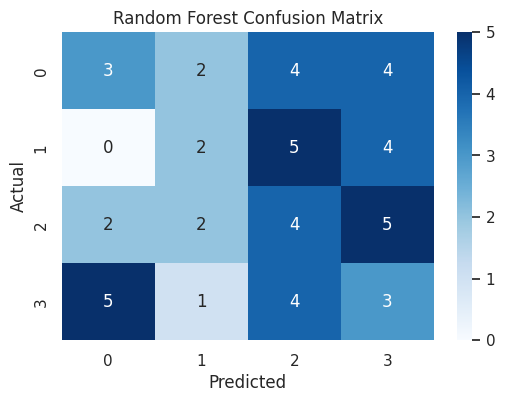

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Drop target and ID columns
X = features_df.drop(columns=['status', 'appointment_id', 'patient_id', 'doctor_id', 'treatment_id'], errors='ignore')
y = features_df['status']

# 2️⃣ Drop all non-numeric columns (keep only numbers)
X = X.select_dtypes(include=['number'])

# 3️⃣ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4️⃣ Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Train models
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Random Forest (no scaling needed for trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6️⃣ Evaluate models
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n🔹 Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 🔍 Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
